# Iris Dataset Classic

In [1]:
# Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
sns.set()

### Load data

In [3]:
df = pd.read_csv('./data/Iris.csv')

In [4]:
# Trả về kích thước của data frame (hàng, cột)
df.shape

(150, 6)

In [5]:
# tóm tắt mô tả thống kê của dữ liệu trong df
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# đếm số lượng dòng thiếu dữ liệu (NaN) trong df
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# đếm số dồng trùng lặp
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# loại bỏ cột Id vì nó không cần thiết
# inplace = True - thực hiện xóa trực tiếp trên df mà không tạo df mới
df.drop(columns='Id',axis=1,inplace=True)

In [10]:
# Trích xuất cột 'Species' từ DataFrame df.
# value_counts(): Đếm số lượng mẫu của mỗi loài trong cột 'Species'.
# reset_index(): Chuyển kết quả của value_counts() thành một DataFrame, cột 'Species' chứa tên mẫu, cột count chứa số lượng mẫu.
species = df['Species'].value_counts().reset_index()
species

,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


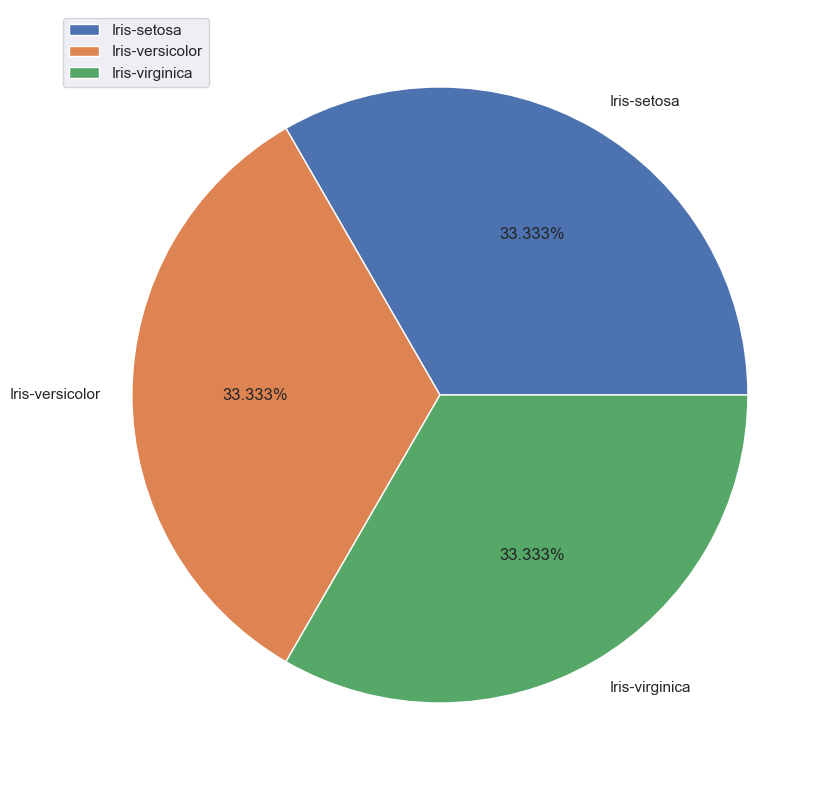

In [11]:
species_values = species['count']
# tạo một biểu đồ với thư viện Matplotlib pyplot, size 10x10
plt.figure(figsize=(10,10))
# Vẽ biểu đồ tròn với dữ liệu được cung cấp từ cột 'Species' của DataFrame Species.
# Các nhãn của các phần được đặt là 'Iris-setosa', 'Iris-versicolor', và 'Iris-virginica'
plt.pie(species_values,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


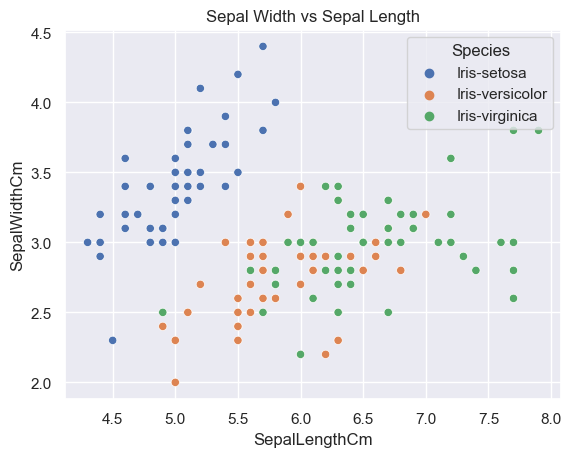

In [13]:
# Tạo biểu đồ phân tán (scatter plot) của đài hoa
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Sepal Width vs Sepal Length')
plt.show()

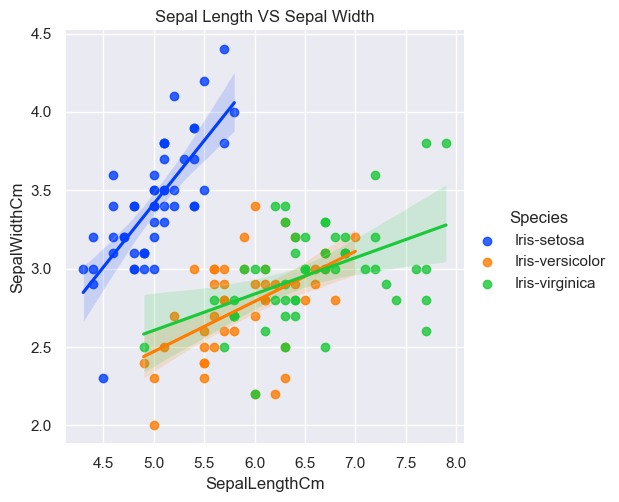

In [14]:
# Tạo biểu đồ phân tán có dòng hồi quy của đài hoa
sns.lmplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

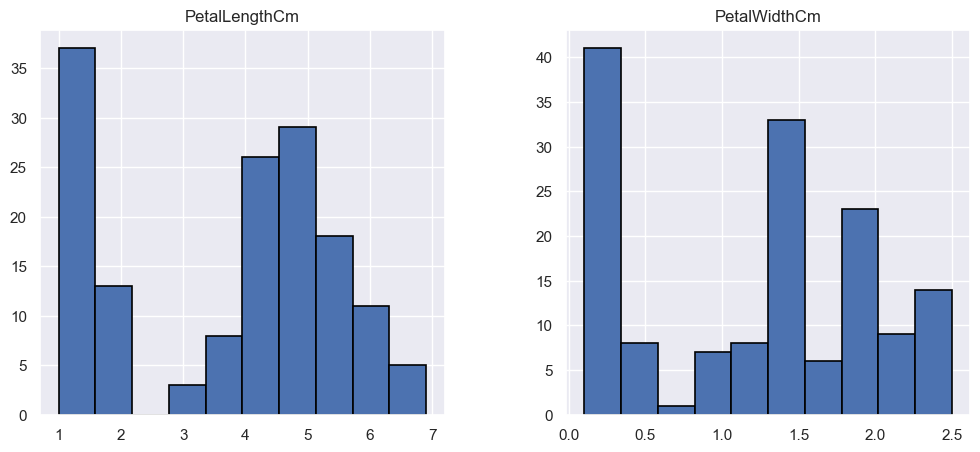

In [15]:
# Biểu đồ cột về sự phân tán cánh hoa theo dài và rộng
selected_columns = ["PetalLengthCm", "PetalWidthCm"]
selected_data = df[selected_columns]
selected_data.hist(edgecolor='black', linewidth=1.2)
plt.gcf().set_size_inches(12, 5)
plt.show()

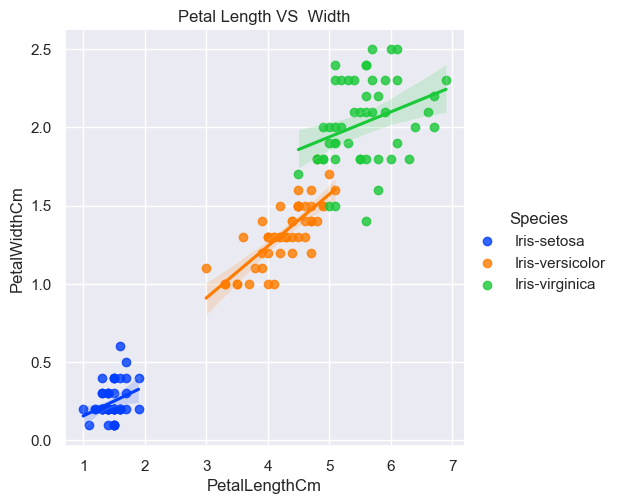

In [16]:
# Biểu đồ phân tán có dòng hồi quy của độ dài và rộng cánh hoa
sns.lmplot(
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS  Width")
plt.show()

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Sử dụng thuật toán KNN để phân loại, đánh giá và tìm các dữ liệu lân cận

In [18]:
newdf = df.drop(columns='Species',axis=1)

In [19]:
# import thư viện để chuẩn bị và phân chia dữ liệu cho việc test & training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

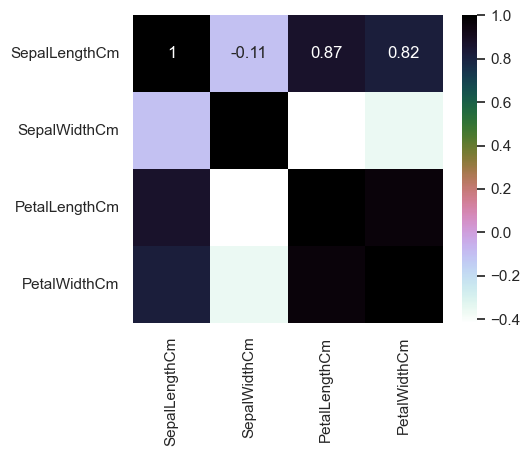

In [20]:
# vẽ heatmap với đầu vào là ma trận tương quan được tính bằng corr()
plt.figure(figsize=(5,4)) 
# với các giá trị tương quan được hiển thị (annot=True)
sns.heatmap(newdf.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [21]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [22]:
# Chia dữ liệu train: 65%, test 35%
train, test = train_test_split(df, test_size = 0.35, shuffle=True)
print(train.shape)
print(test.shape)

(97, 5)
(53, 5)


In [23]:
# Chọn những đặc trưng để phục vụ huấn luyện
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# Nhãn tương ứng với dữ liệu huấn luyện
train_y=train.Species
# print(train_y)
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [24]:
# import thư viện KNN
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# n_neighbors=3: đại diện cho số lượng láng giềng gần nhất mà mô hình sẽ xem xét khi dự đoán.
# Trong TH này, mô hình sẽ xem xét 3 láng giềng gần nhất để quyết định lớp của một điểm dữ liệu mới.
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
# Sử dụng hàm fit() để bắt đầu huấn luyện với dữ liệu và nhãn
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(train_X, train_y)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(test_X, test_y)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 0.96 out of 1 on test data


In [28]:
# dự đoán nhãn cho các điểm dữ liệu mới dựa trên các đặc trưng
predictions = knn.predict(test_X)
predictions

array([0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 0, 0, 0, 2, 2])

#### KNN (thủ công)

In [29]:
dt = pd.read_csv("./data/Iris.csv")
dt.head()
dt.rename(columns={'SepalLengthCm': 'sepal_length', 'SepalWidthCm': 'sepal_width',
                      'PetalLengthCm': 'petal_length', 'PetalWidthCm': 'petal_width'}, inplace=True)
X = dt[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = dt['Species']

In [30]:
# Khoảng cách Euclidean
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

# Khoảng cách Manhattan
def manhattan_distance(x1, x2):
     return np.sum(np.abs(x1 - x2))

# Khoảng cách Cosine
def cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)

    similarity = dot_product / (norm_x1 * norm_x2)
    distance = 1 - similarity

    return distance

In [31]:
def k_nearest_neighbors(train_data, test_point, k=3, distance_measure='euclidean'):
    distances = []

    for i in range(len(train_data)):
        if distance_measure == 'euclidean':
            distance = euclidean_distance(test_point, train_data.iloc[i])
        elif distance_measure == 'manhattan':
            distance = manhattan_distance(test_point, train_data.iloc[i])
        elif distance_measure == 'cosine':
            distance = cosine_similarity(test_point, train_data.iloc[i])
        else:
            raise ValueError("Invalid distance measure. Choose 'euclidean', 'manhattan', or 'cosine'.")

        distances.append((distance, i))

    distances.sort()
    neighbors = [train_data.index[i] for (_, i) in distances[:k]]
    return neighbors

In [32]:
k_values = [3, 5, 7] 
distance_measures = ['euclidean', 'manhattan', 'cosine']

for k in k_values:
    for distance_measure in distance_measures:
        correct_predictions = 0
        predicted_classes = []

        for i in range(len(test_X)):
            neighbors = k_nearest_neighbors(train_X, test_X.iloc[i], k=k, distance_measure=distance_measure)
            
            class_votes = [train_y.loc[neighbor] for neighbor in neighbors]
            
            prediction = max(set(class_votes), key=class_votes.count)
            
            predicted_classes.append(prediction)

            if prediction == test_y.iloc[i]:
                correct_predictions += 1

        accuracy = metrics.accuracy_score(test_y, predicted_classes)

        print(f"K = {k}, Distance Measure = {distance_measure}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"Correct Predictions: {correct_predictions}")
        print(f"Wrong Predictions: {len(test_X) - correct_predictions}")
        print("="*50)

K = 3, Distance Measure = euclidean
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2
K = 3, Distance Measure = manhattan
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2
K = 3, Distance Measure = cosine
Accuracy: 94.34%
Correct Predictions: 50
Wrong Predictions: 3
K = 5, Distance Measure = euclidean
Accuracy: 94.34%
Correct Predictions: 50
Wrong Predictions: 3
K = 5, Distance Measure = manhattan
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2
K = 5, Distance Measure = cosine
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2
K = 7, Distance Measure = euclidean
Accuracy: 94.34%
Correct Predictions: 50
Wrong Predictions: 3
K = 7, Distance Measure = manhattan
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2
K = 7, Distance Measure = cosine
Accuracy: 96.23%
Correct Predictions: 51
Wrong Predictions: 2


#### Decision Tree

In [33]:
from sklearn import tree

Điểm số trên tập kiểm tra là: 0.9622641509433962


[Text(0.375, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.664\nsamples = 97\nvalue = [30, 31, 36]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.75\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.25, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.067\nsamples = 29\nvalue = [0, 28, 1]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(0.625, 0.4166666666666667, 'x[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.5, 0.25, 'x[0] <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0

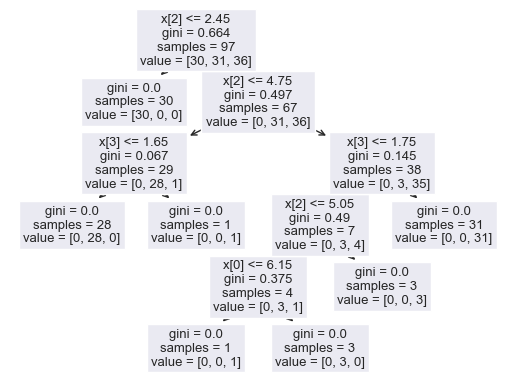

In [34]:
# Khởi tạo mô hình Decision Tree Classifier
decision_tree = tree.DecisionTreeClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
tr = decision_tree.fit(train_X, train_y)

# Dự đoán nhãn cho dữ liệu kiểm tra
predictions = decision_tree.predict(test_X)

# Tính toán độ chính xác bằng cách so sánh nhãn dự đoán với nhãn thực tế
accuracy = metrics.accuracy_score(predictions,test_y)

print("Điểm số trên tập kiểm tra là:", accuracy)
tree.plot_tree(tr)

In [35]:
class DecisionNode:
    def __init__(self, feature_i=None, threshold=None, value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i
        self.threshold = threshold
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch

#### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Naive Bayes
naive_bayes = GaussianNB()

# Huấn luyện mô hình trên tập huấn luyện
naive_bayes.fit(train_X, train_y)

# Dự đoán nhãn cho dữ liệu kiểm tra
predictions = naive_bayes.predict(test_X)

# Chấm điểm
accuracy = metrics.accuracy_score(predictions,test_y)

print("Điểm số trên tập kiểm tra là:", accuracy)

Điểm số trên tập kiểm tra là: 0.9622641509433962


### Naive Bayes (thủ công)

In [37]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes, y_idx, self.class_counts = np.unique(y, return_inverse=True, return_counts=True)
        self.class_prior = self.class_counts / len(y)
        self.likelihoods = []
        for i in range(len(self.classes)):
            X_class = X[y_idx==i, :]
            self.likelihoods.append([(np.mean(X_class[:, j]), np.std(X_class[:, j])) for j in range(X_class.shape[1])])
        return self

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        posteriors = []
        for i in range(len(self.classes)):
            prior = np.log(self.class_prior[i])
            class_likelihood = np.sum(np.log(self._pdf(i, x)))
            posterior = prior + class_likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        output = []
        class_likelihood = self.likelihoods[class_idx]
        for i in range(len(class_likelihood)):
            mean, std = class_likelihood[i]
            numerator = np.exp(-(x[i]-mean)**2 / (2 * std))
            denominator = np.sqrt(2 * np.pi * std)
            output.append(numerator / denominator)
        return output



In [39]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
naive_bayes = NaiveBayes()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
print("Naive Bayes Accuracy:", np.sum(y_pred == y_test) / len(y_test))

Naive Bayes Accuracy: 0.9555555555555556
